<a href="https://colab.research.google.com/github/puskuriashwitha/task-6--K-Nearest-Neighbors-KNN-Classification/blob/main/Task_6_K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# ⿢ Load Dataset
df = pd.read_csv("/content/Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
# Experiment with different values of K
k_values = [1, 3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"\nK = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


K = 1
Accuracy: 0.7111111111111111
Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  7  6]]

K = 3
Accuracy: 0.8
Confusion Matrix:
 [[19  0  0]
 [ 0  6  7]
 [ 0  2 11]]

K = 5
Accuracy: 0.7777777777777778
Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  4  9]]

K = 7
Accuracy: 0.8
Confusion Matrix:
 [[19  0  0]
 [ 0  8  5]
 [ 0  4  9]]


In [7]:
# Visualize decision boundary for the best K (example with K=3)
k_best = 3
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Create mesh grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [9]:
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

<Figure size 800x600 with 0 Axes>

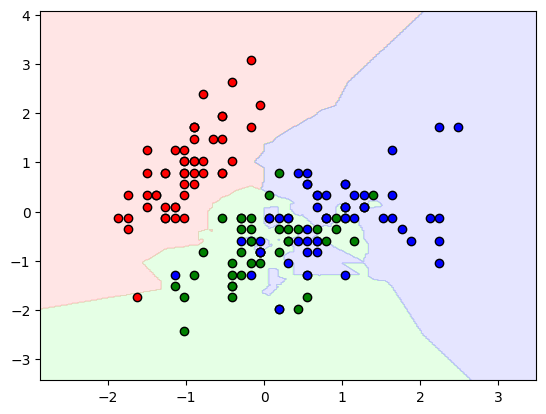

In [10]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
for idx, class_label in enumerate(np.unique(y)):
    plt.scatter(X_scaled[y == class_label, 0], X_scaled[y == class_label, 1],
                c=cmap_bold[idx], label=iris.target_names[class_label], edgecolor='k')

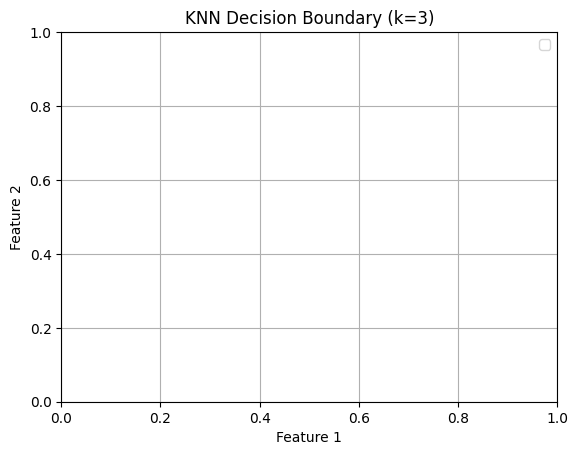

In [11]:
plt.title(f"KNN Decision Boundary (k={k_best})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()